In [399]:
import os
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Imports.

In [400]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip # Data from https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb

--2020-12-12 12:11:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c03::80, 2404:6800:4003:c00::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   130MB/s    in 0.5s    

2020-12-12 12:11:33 (130 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [401]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/tmp/cats_and_dogs_filtered.zip' mode='r'>>

In [402]:
os.listdir("/tmp/cats_and_dogs_filtered")

['validation', 'vectorize.py', 'train']

In [403]:
os.listdir("/tmp/cats_and_dogs_filtered/validation")

['dogs', 'cats']

In [404]:
os.listdir("/tmp/cats_and_dogs_filtered/validation/cats")[:10]

['cat.2150.jpg',
 'cat.2246.jpg',
 'cat.2239.jpg',
 'cat.2453.jpg',
 'cat.2174.jpg',
 'cat.2291.jpg',
 'cat.2399.jpg',
 'cat.2076.jpg',
 'cat.2416.jpg',
 'cat.2095.jpg']

# Data Preperation

In [405]:
CAT = 0
DOG = 1

def load_images(dir_path):
  """
  This function loads all the data from the directories.
  :param dir_path: str, the path of the photos
  :return: tuple of X and y. X contains all the photos as numpy array, and y contain their type.
  """
  X, y = [], []

  print(dir_path)

  CATS_PATH = os.listdir(dir_path + "cats")
  DOGS_PATH = os.listdir(dir_path + "dogs")

  for path in CATS_PATH: # Get all cat photos.
    img = image.load_img(dir_path + "cats/" + path)
    img = image.img_to_array(img)
    img = tf.image.resize(img, (150, 150))
    X.append(img.numpy())
    y.append(CAT)

  for path in DOGS_PATH: # Get all dog photos.
    img = image.load_img(dir_path + "dogs/" + path)
    img = image.img_to_array(img)
    img = tf.image.resize(img, (150, 150))
    X.append(img.numpy())
    y.append(DOG)
    
  return X, y

In [406]:
PATH_TRAIN = "/tmp/cats_and_dogs_filtered/train/"
PATH_TEST = "/tmp/cats_and_dogs_filtered/validation/"
(X_train, y_train), (X_test, y_test) = load_images(PATH_TRAIN), load_images(PATH_TEST) # get the data

/tmp/cats_and_dogs_filtered/train/
/tmp/cats_and_dogs_filtered/validation/


In [407]:
df_train = pd.DataFrame({"X_train": X_train, "y_train": y_train})
df_test = pd.DataFrame({"X_test": X_test, "y_test": y_test})

df_train = shuffle(df_train)


X_train_final = []
X_test_final = []
y_train_final = []
y_test_final = []

for i in range(len(list(df_train.X_train))):
  X_train_final.append(np.array(list(df_train.X_train)[i]) / 255)
  y_train_final.append(list(df_train.y_train)[i])

for i in range(len(list(df_test.X_test))):
  X_test_final.append(np.array(list(df_test.X_test)[i]) / 255)
  y_test_final.append(list(df_test.y_test)[i])

X_train_final = np.array(X_train_final)
X_test_final = np.array(X_test_final)
y_train_final = np.array(y_train_final)
y_test_final = np.array(y_test_final)
# Data preperation

In [408]:
X_train_final.shape, X_test_final.shape, y_train_final.shape, y_test_final.shape

((2000, 150, 150, 3), (1000, 150, 150, 3), (2000,), (1000,))

0


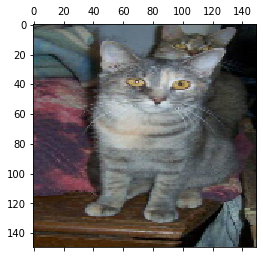

0


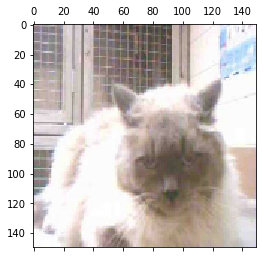

0


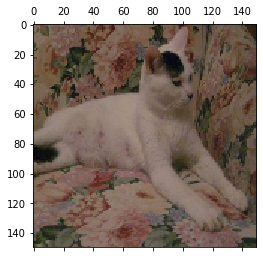

0


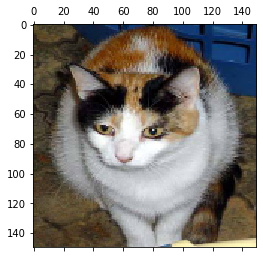

0


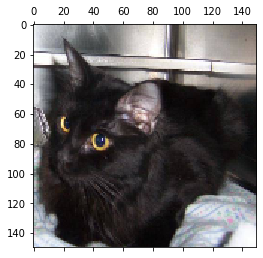

0


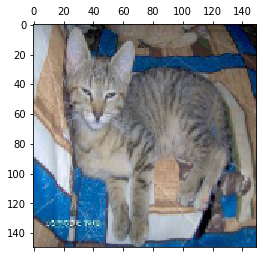

0


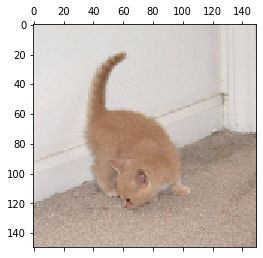

1


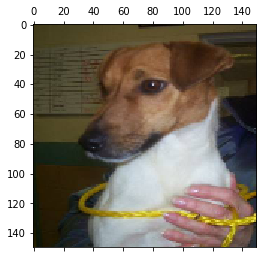

1


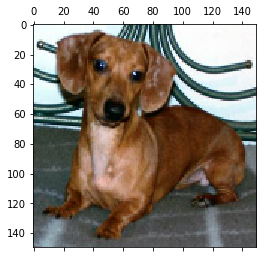

1


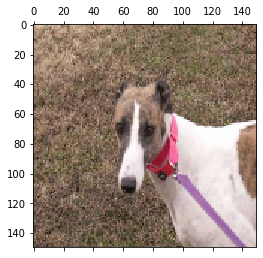

In [409]:
for i in range(10):
  plt.matshow(X_train_final[i])
  print(y_train_final[i])
  plt.show()

# Model

In [442]:
model = Sequential([
  layers.Conv2D(128, (3, 3), activation="relu", padding="same", kernel_regularizer=regularizers.l2()),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), activation="relu", padding="same", kernel_regularizer=regularizers.l2()),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), activation="relu", padding="same", kernel_regularizer=regularizers.l2()),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2()),
  layers.Dropout(0.3),
  layers.Dense(2, activation="softmax")                
])


In [443]:
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [444]:
model.fit(X_train_final, y_train_final, epochs=40)

Epoch 1/40
63/63 [==============================] - 4s 68ms/step - loss: 3.2701 - accuracy: 0.5105
Epoch 2/40
63/63 [==============================] - 4s 67ms/step - loss: 3.2056 - accuracy: 0.5195
Epoch 3/40
63/63 [==============================] - 4s 67ms/step - loss: 3.1430 - accuracy: 0.5030
Epoch 4/40
63/63 [==============================] - 4s 67ms/step - loss: 3.0820 - accuracy: 0.4855
Epoch 5/40
63/63 [==============================] - 4s 67ms/step - loss: 3.0226 - accuracy: 0.5285
Epoch 6/40
63/63 [==============================] - 4s 67ms/step - loss: 2.9646 - accuracy: 0.4895
Epoch 7/40
63/63 [==============================] - 4s 68ms/step - loss: 2.9080 - accuracy: 0.5085
Epoch 8/40
63/63 [==============================] - 4s 67ms/step - loss: 2.8529 - accuracy: 0.5125
Epoch 9/40
63/63 [==============================] - 4s 67ms/step - loss: 2.7991 - accuracy: 0.5215
Epoch 10/40
63/63 [==============================] - 4s 67ms/step - loss: 2.7467 - accuracy: 0.4910
Epoch 11/

In [445]:
y_pred = model.predict(X_test_final)
y_predicted = []

for item in y_pred:
  y_predicted.append(np.argmax(item))
y_predicted = np.array(y_predicted)

In [446]:
print(accuracy_score(y_test_final, y_predicted))

0.546


In [447]:
print(classification_report(y_test_final, y_predicted))

              precision    recall  f1-score   support

           0       0.54      0.68      0.60       500
           1       0.56      0.41      0.47       500

    accuracy                           0.55      1000
   macro avg       0.55      0.55      0.54      1000
weighted avg       0.55      0.55      0.54      1000



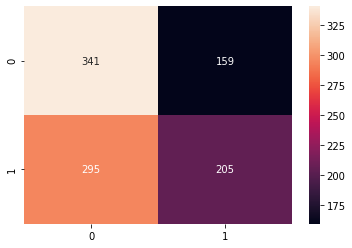

In [448]:
cm = confusion_matrix(y_test_final, y_predicted)
seaborn.heatmap(cm, annot=True, fmt="d")

In [449]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_147 (Conv2D)          (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_148 (MaxPoolin (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 37, 37, 32)        18464     
_________________________________________________________________
max_pooling2d_149 (MaxPoolin (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_49 (Flatten)         (None, 10368)           